In [ ]:
# June 12
#Program to solve for different parameter combinations that lead to stable-degrading solutions of f(x)

from scipy.optimize import fsolve
from math import exp
import numpy as np

# using the left-side solution centered at x = 0
def unbinding_rate(p,r,L):
    # note: the point one bp to the left of center is -1 for all L
    _ = (((1/p - 1)*r - 1)*exp(((1/p - 1)*r - 1)*(-1)))/(1 - exp(((1/p - 1)*r - 1)*(-L/2)))
    return(_)

# value of unbinding rate above which the system is stable-degrading (and under which system is stable)

#program

p = .6 # prob of rw stepping outwards
r = 1.2 #ratio of rate going towards 3' end over rate going towards 5' end
#L is the variable

####wait lol it's not a trancendental eqn for L. revisit this if it's relevant (to find p,r for fixed L)

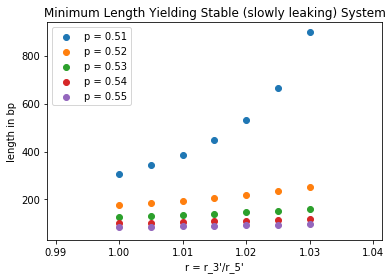

In [2]:
#June 12

#plot values of L above that make an asymmetrical rw system stable (as opposed to stable-decaying)

#done for LEFT side solution of a system centered at x = 0

from math import log, exp
import numpy as np
import matplotlib.pyplot as plt

def alpha(p,r):
    _ = (1/p - 1)*r - 1
    return(_)

def func(p,r,thresh):
    _ = -2/alpha(p,r) * log(1 - alpha(p,r)/thresh*exp(alpha(p,r)*(-1)))
    return(_)

###

p_vals = [.51,.52,.53,.54,.55] #prob of a rw stepping out
r_init = 1
r_final = 1.03
r_step = .005
thresh = .0001 #value of unbinding rate above above which system is stable-degrading and below which system is stable

r_vals = np.arange(r_init,r_final+r_step,r_step) #inclusive of r_final
plt.figure(0)

for p in p_vals:
    
    #shave off r values that will make the system unstable for all L (make f(x) concave up)
    r_array = []
    for r in r_vals:
        if r < p/(1-p):
            r_array.append(round(r,3))

    L_array = [0] * len(r_array)

    for ind, val in enumerate(r_array):
        L_array[ind] = func(p,val,thresh)
    
    plt.scatter(r_array,L_array, label='p = %.2f' % p)
        
plt.title("Minimum Length Yielding Stable (slowly leaking) System")
plt.xlabel("r = r_3'/r_5'")
plt.ylabel("length in bp")
plt.legend()
plt.show()





